In [1]:
library('data.table')
library('extraDistr')
library('foreach')
library('khroma')

source('tplotfunctions.R')
source('guessmetadata.R')
source('buildagent.R')
source('infer.R')
source('decide.R')
source('mutualinfo.R')
source('rF.R')
source('plotFsamples1D.R')

## Modify '10' below if the plots are too large or too small
options(repr.plot.width=10*sqrt(2), repr.plot.height=10)

# Building the agents

In [2]:
guessmetadata(data='C:\\HVL\\OneDrive - Høgskulen på Vestlandet\\ADA511\\R\\OPM\\project\\transducer_dataframe.csv',
              file='metadata.csv')

In [3]:
traindata <- fread('C:\\HVL\\OneDrive - Høgskulen på Vestlandet\\ADA511\\R\\OPM\\project\\transducer_dataframe.csv', header=TRUE)


In [4]:
RNopm <- buildagent(metadata='metadata.csv',
                     data=traindata)

In [5]:
RNopm10 <- buildagent(metadata='metadata.csv',
                     data=traindata[1:10])

In [6]:
str(RNopm)

List of 4
 $ counts   : num [1:2, 1:2] 3724 26 91 3659
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Predicted: chr [1:2] "cat" "dog"
  .. ..$ Actual   : chr [1:2] "cat" "dog"
 $ alphas   : num [1:21] 1 2 4 8 16 32 64 128 256 512 ...
 $ auxalphas: num [1:21] -5804 -5804 -5806 -5810 -5821 ...
 $ palphas  : num [1:21] 4.59e-01 4.54e-01 8.62e-02 7.73e-04 2.02e-08 ...
 - attr(*, "class")= chr [1:2] "agent" "list"


In [7]:
str(RNopm10)

List of 4
 $ counts   : num [1:2, 1:2] 10 0 0 0
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Predicted: chr [1:2] "cat" "dog"
  .. ..$ Actual   : chr [1:2] "cat" "dog"
 $ alphas   : num [1:21] 1 2 4 8 16 32 64 128 256 512 ...
 $ auxalphas: num [1:21] -5.42 -6.62 -8.3 -10.37 -12.6 ...
 $ palphas  : num [1:21] 0.70627 0.23284 0.05083 0.00822 0.00127 ...
 - attr(*, "class")= chr [1:2] "agent" "list"


# RNopm

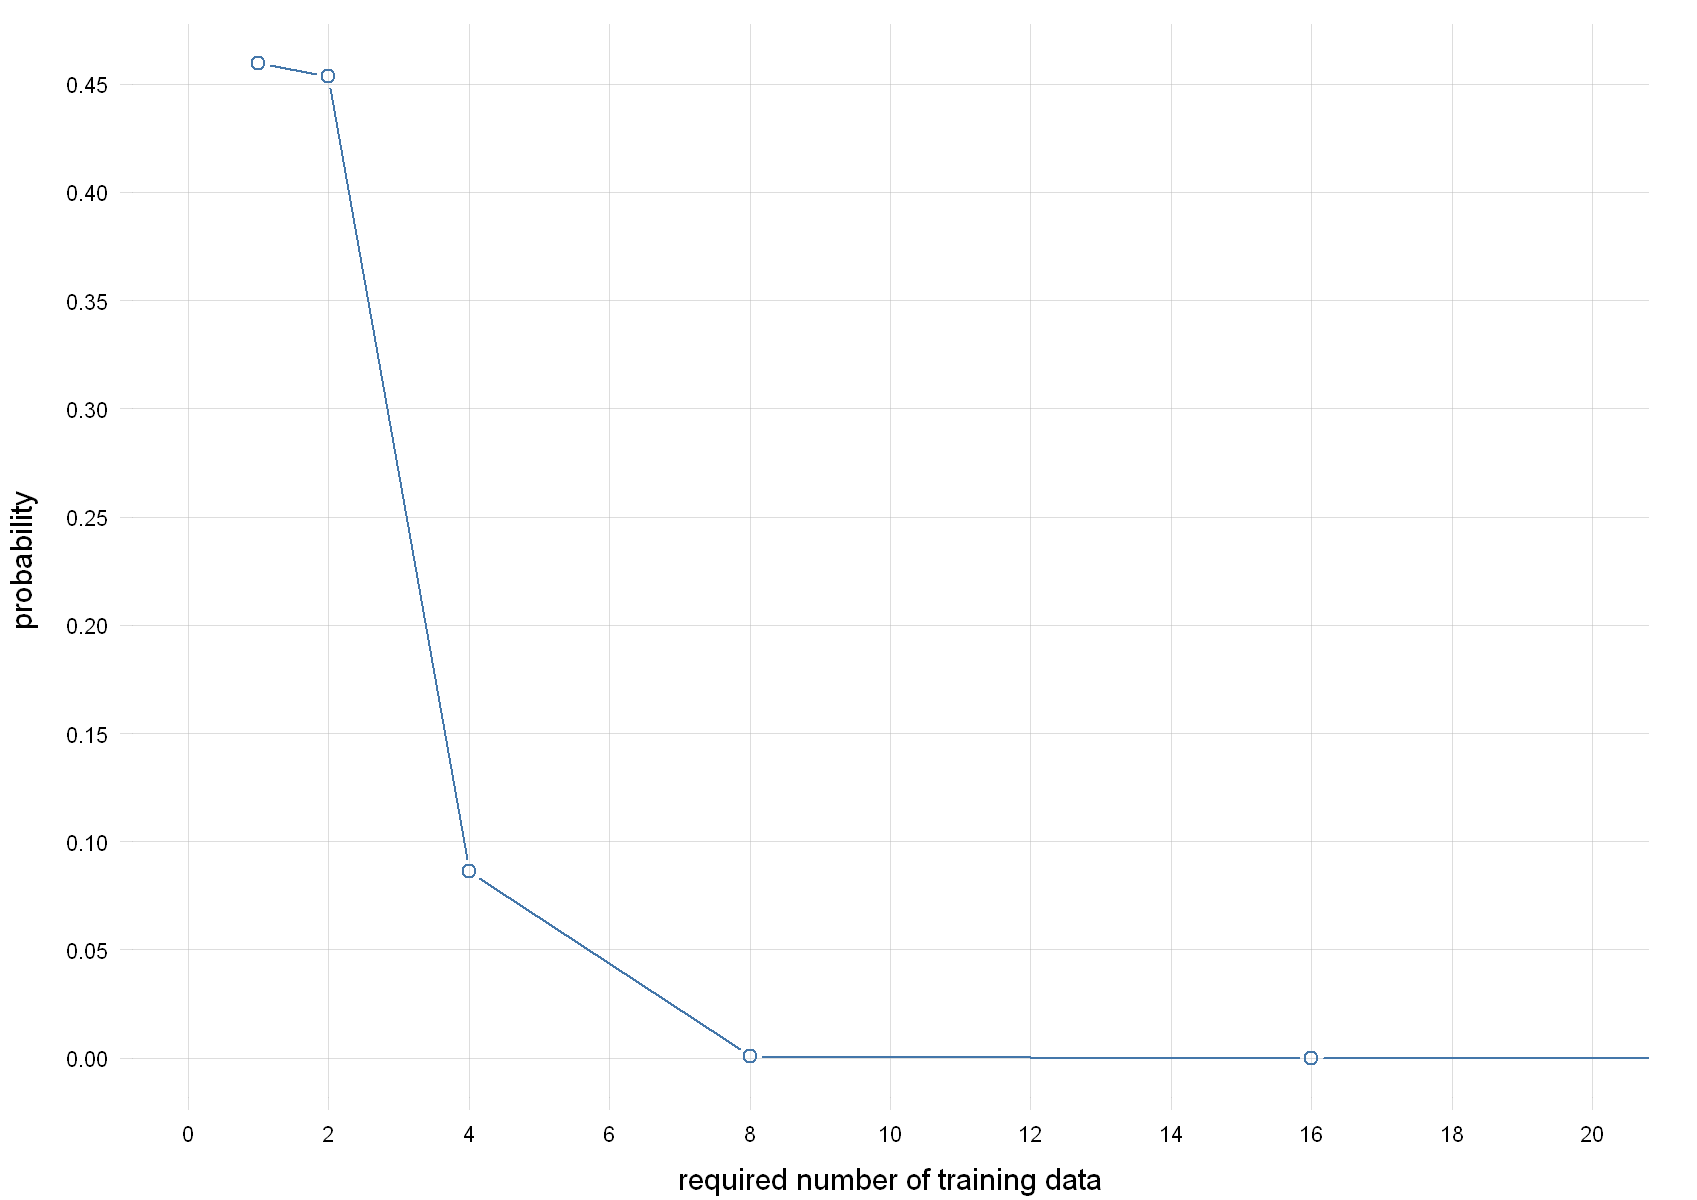

In [8]:
tplot(x=RNopm$alphas, y=RNopm$palphas, type='b',
      xlim=c(0, 20), ylim=c(0, NA),
      xlab='required number of training data', ylab='probability')

In [9]:
infer(agent=RNopm,
        predictand='Actual',
        predictor=list(Predicted='cat'))

Actual
       cat        dog 
0.97603963 0.02396037

In [10]:

infer(agent=RNopm,
        predictand='Actual',
        predictor=list(Predicted='dog'))

Actual
        cat         dog 
0.007170487 0.992829513

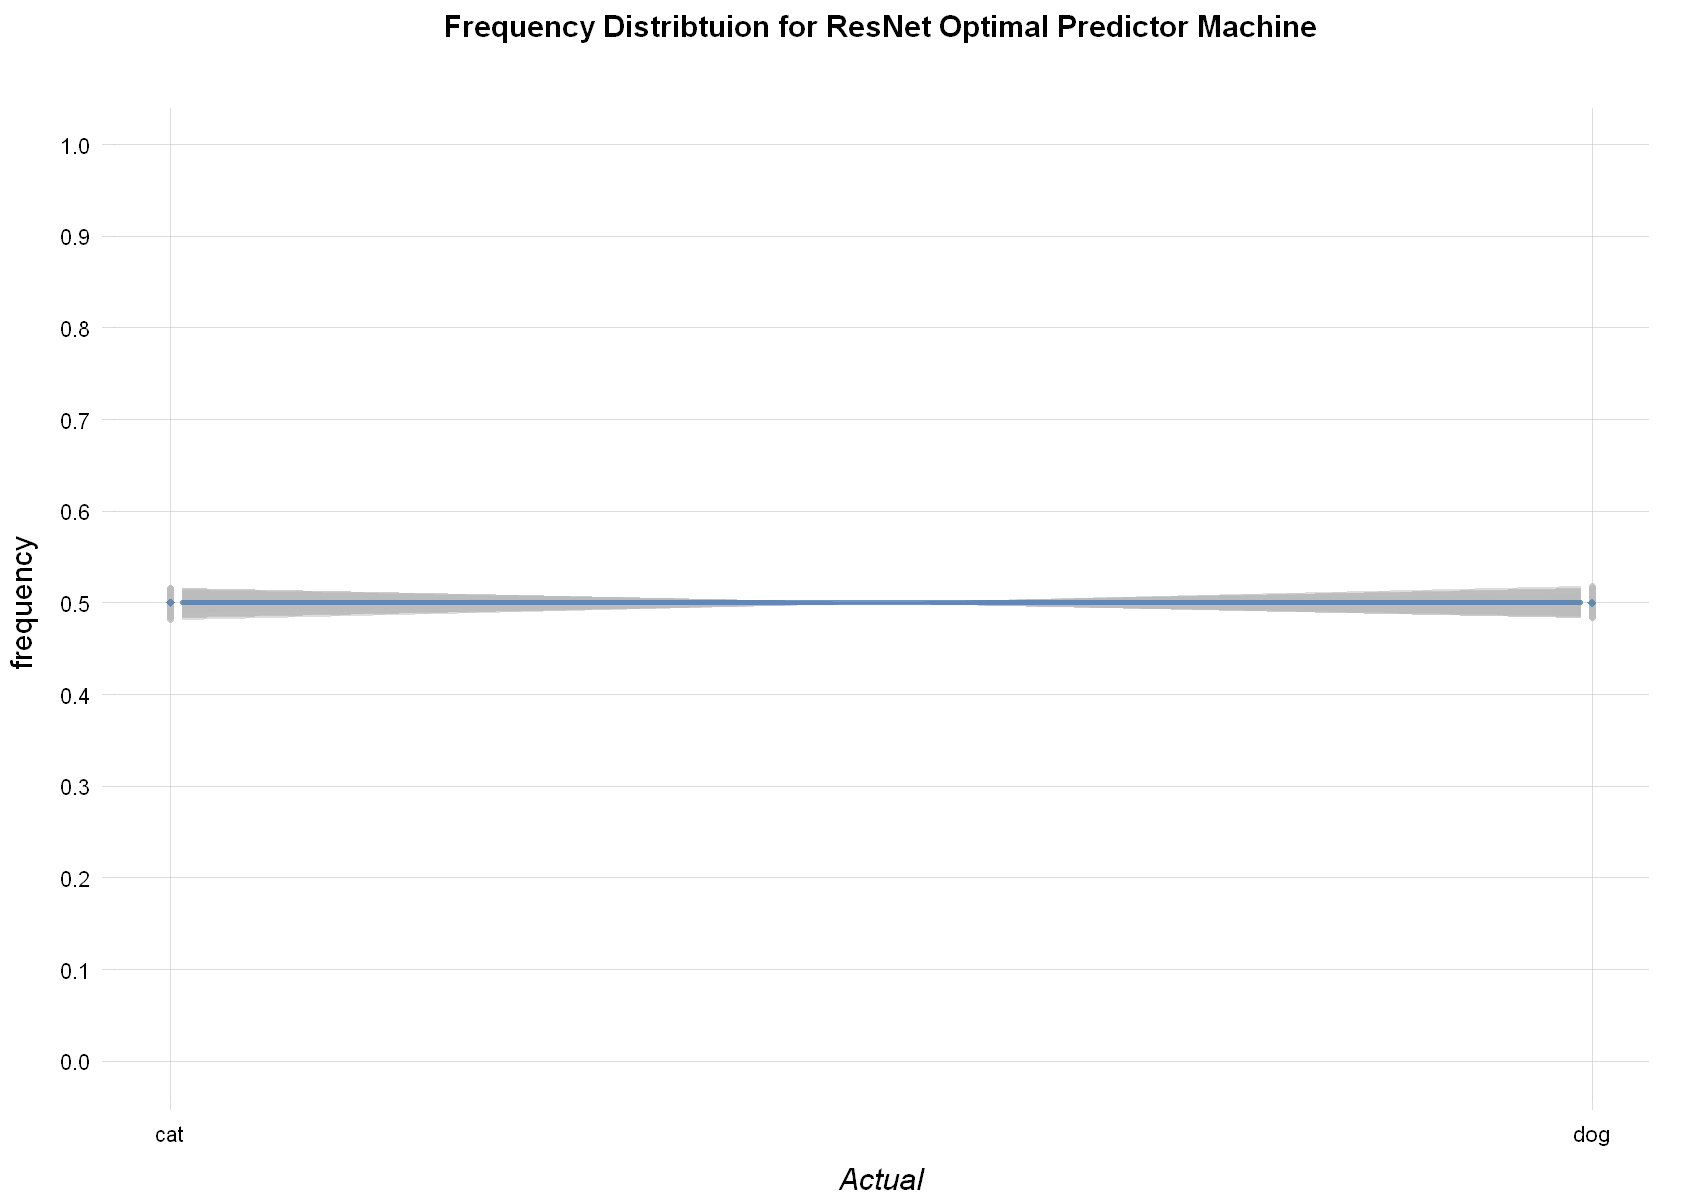

In [18]:
plotFsamples1D(agent=RNopm,
               n=1000, # number of example frequency distributions
               predictand='Actual',
               ylim=c(0,1), # y-axis range
               main='Frequency Distribtuion for ResNet Optimal Predictor Machine') # plot title

# RNopm10

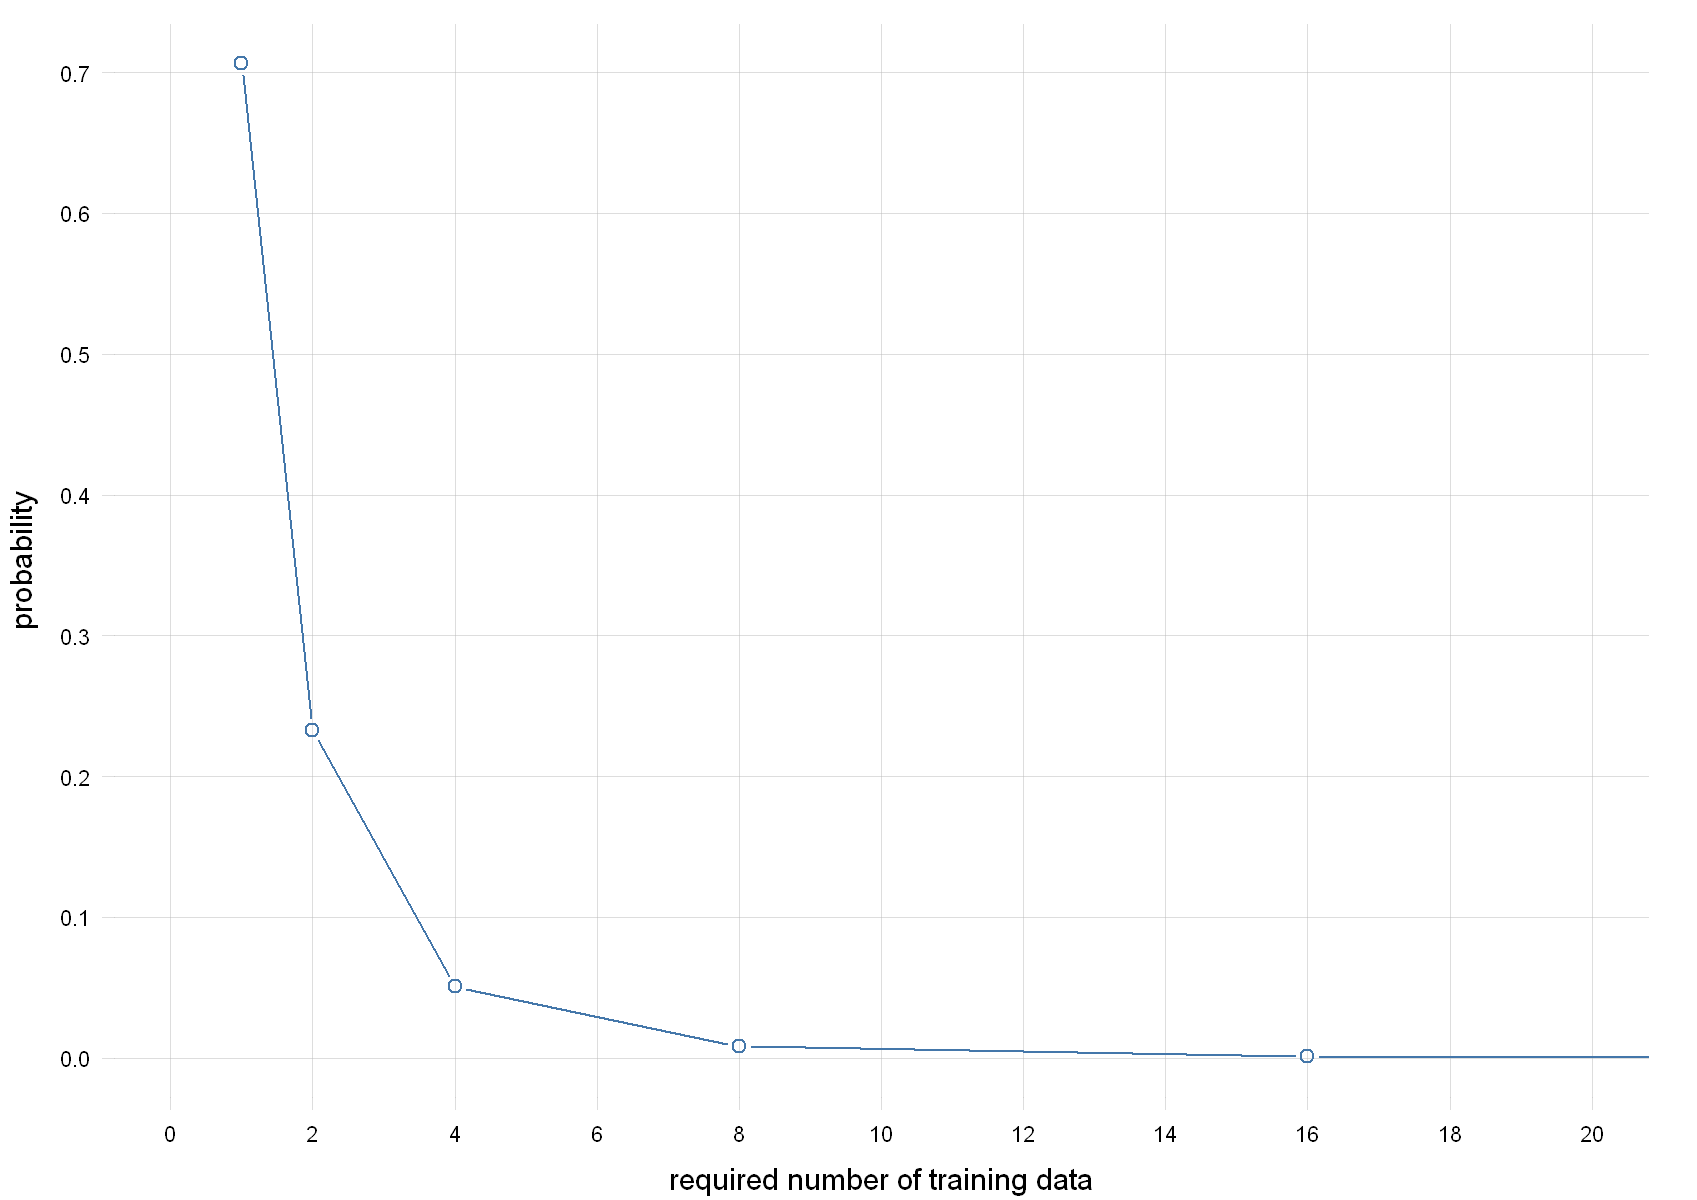

In [12]:
tplot(x=RNopm10$alphas, y=RNopm10$palphas, type='b',
      xlim=c(0, 20), ylim=c(0, NA),
      xlab='required number of training data', ylab='probability')

In [13]:
infer(agent=RNopm10,
        predictand='Actual',
        predictor=list(Predicted='cat'))

Actual
       cat        dog 
0.96738829 0.03261171

In [14]:

infer(agent=RNopm10,
        predictand='Actual',
        predictor=list(Predicted='dog'))

Actual
cat dog 
0.5 0.5

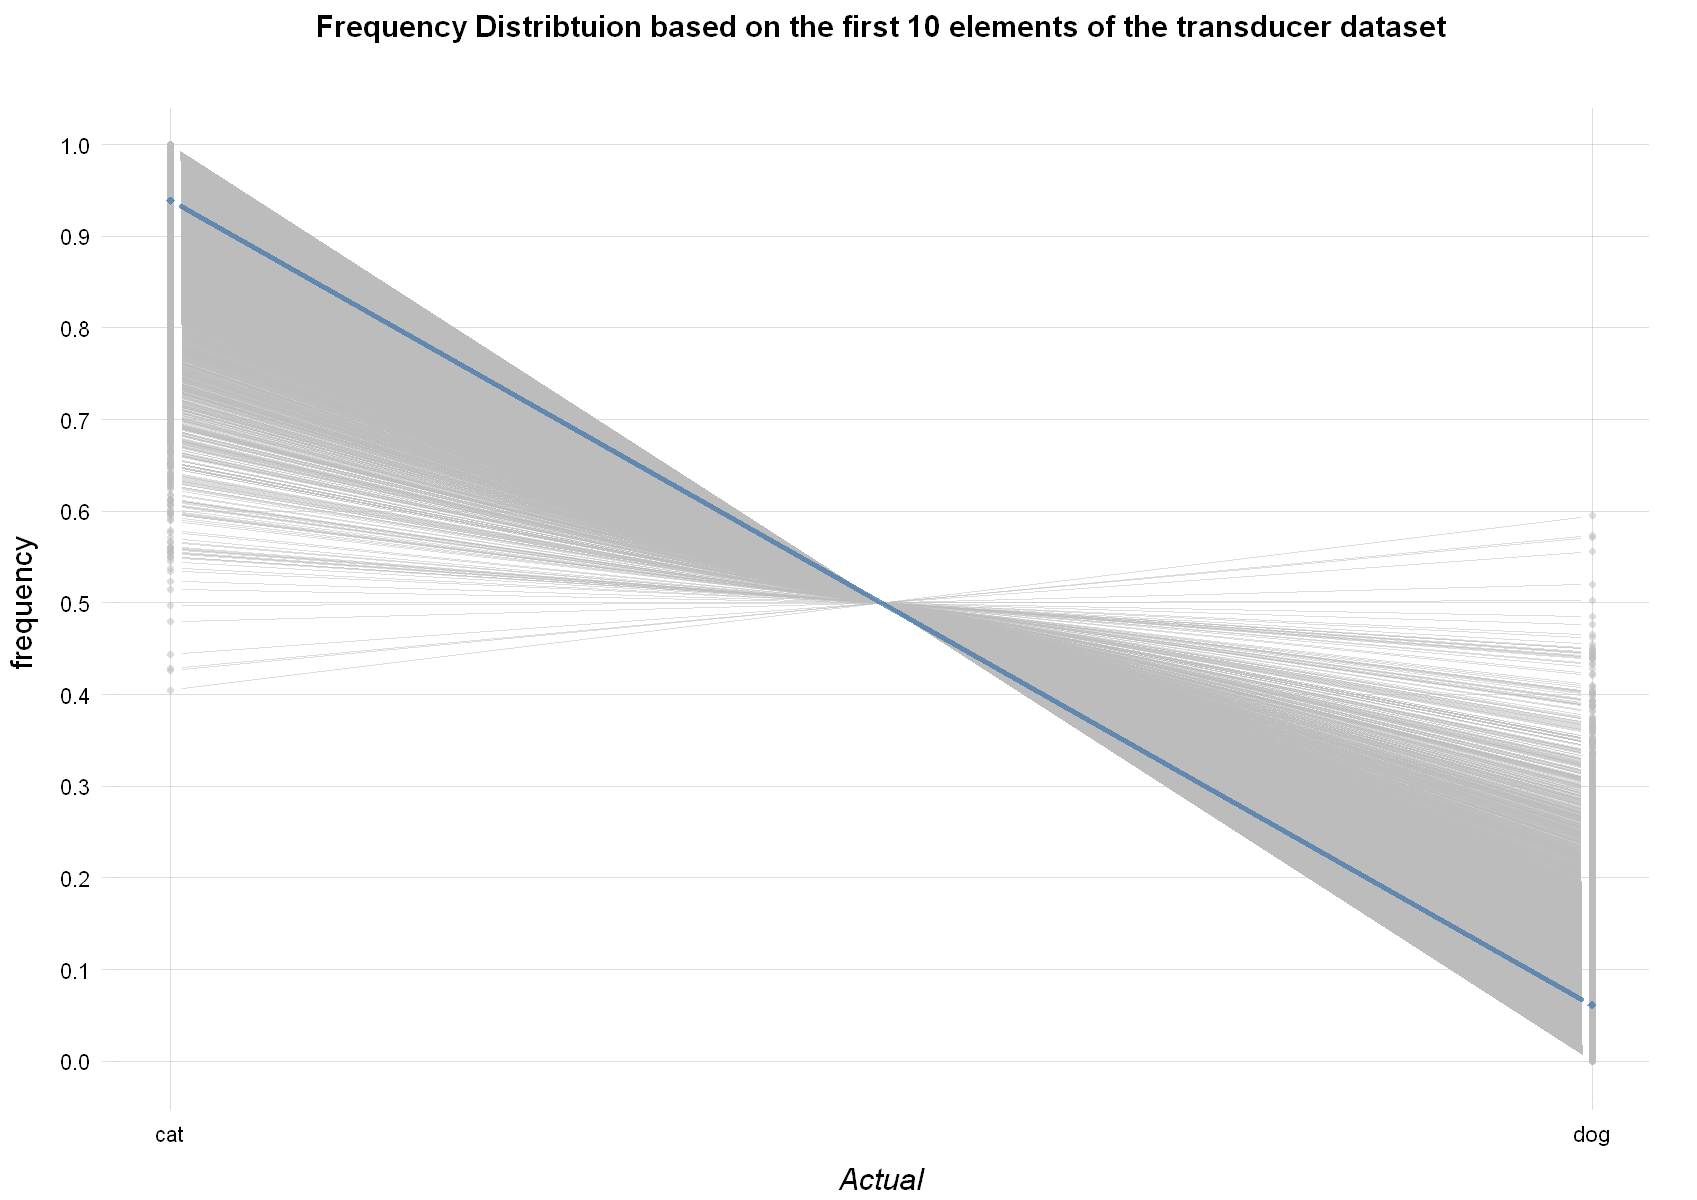

In [22]:
plotFsamples1D(agent=RNopm10,
               n=10000, # number of example frequency distributions
               predictand='Actual',
               ylim=c(0,1), # y-axis range
               main='Frequency Distribtuion based on the first 10 elements of the transducer dataset') # plot title

In [16]:
# ## Load test data
# testdata <- fread('test_dataframe.csv', header=TRUE)
# ntest <- nrow(testdata) # size of test dataset

# testprobs <- numeric(ntest) # prepare vector of probabilities
# testhits <- numeric(ntest) # prepare vector of hits
# for(i in 1:ntest){

# ## calculate probabilities given all variates except 'Actual' (The true label)
# probs <- infer(agent=RNopm, predictor=testdata[i, !'Actual'])

# ## store the probability for <=50K
# testprobs[i] <- probs['<=50K']

# ## decide on one value
# chosenvalue <- decide(probs=probs)

# ## check if decision == true_value, and store result
# testhits[i] <- (chosenvalue == testdata[i, 'income'])
# }
